<a href="https://colab.research.google.com/github/sakshigarg1098/Breast-Cancer-Detection/blob/main/Breast_Bancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn

In [4]:
data_frame=pandas.read_csv('/content/data.csv')
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [8]:
data_frame.shape

(569, 32)

In [3]:
data_frame.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
data_frame = data_frame.dropna(axis=1)

In [7]:
data_frame.shape

(569, 32)

In [9]:
data_frame.groupby('diagnosis').size()

diagnosis
B    357
M    212
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


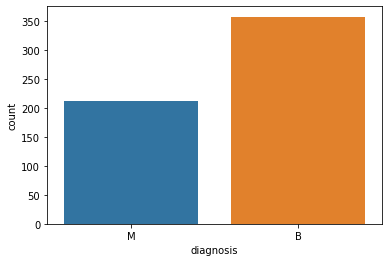

In [10]:
from matplotlib.colors import ListedColormap
seaborn.countplot(data_frame['diagnosis'], label="Count")
plt.show()

In [11]:
data_frame.iloc[:,1:32].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,0.679090,-0.097317,0.674172,0.735864,-0.222600,0.206000,0.194204,0.376169,-0.104321,-0.042641,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,0.275869,0.386358,0.281673,0.259845,0.006614,0.191975,0.143293,0.163851,0.009127,0.054458,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,0.691765,-0.086761,0.693135,0.744983,-0.202694,0.250744,0.228082,0.407217,-0.081629,-0.005523,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,0.732562,-0.066280,0.726628,0.800086,-0.166777,0.212583,0.207660,0.372320,-0.072497,-0.019887,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,0.301467,0.068406,0.296092,0.246552,0.332375,0.318943,0.248396,0.380676,0.200774,0.283607,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,0.497473,0.046205,0.548905,0.455653,0.135299,0.738722,0.570517,0.642262,0.229977,0.507318,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,0.631925,0.076218,0.660391,0.617427,0.098564,0.670279,0.691270,0.683260,0.178009,0.449301,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,0.698050,0.021480,0.710650,0.690299,0.027653,0.490424,0.439167,0.615634,0.095351,0.257584,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,0.303379,0.128053,0.313893,0.223970,0.187321,0.421659,0.342627,0.393298,0.449137,0.331786,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,0.000111,0.164174,0.039830,-0.090170,0.401964,0.559837,0.446630,0.341198,0.345007,0.688132,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


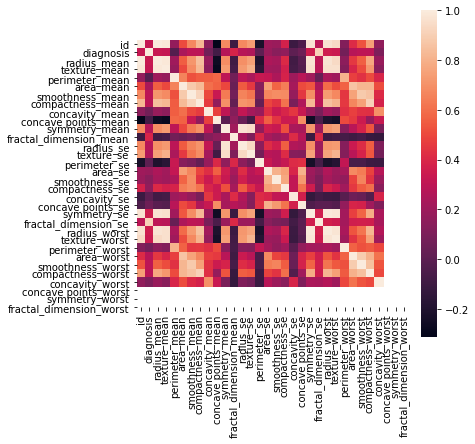

In [12]:
plt.figure(figsize=(6,6))
seaborn.heatmap(data_frame.iloc[:,1:31].corr(), cbar=True, annot=False, yticklabels=data_frame.columns,
                square=True,xticklabels=data_frame.columns)
plt.show()

In [14]:
high_correlation = data_frame.iloc[:,1:32].corr().abs()
high_correlation_unstack = high_correlation.unstack()
high_correlation_sort = high_correlation_unstack.sort_values(ascending=False)
high_correlation_sort[30:35]

radius_mean      perimeter_mean     0.997855
perimeter_mean   radius_mean        0.997855
radius_worst     perimeter_worst    0.993708
perimeter_worst  radius_worst       0.993708
radius_mean      area_mean          0.987357
dtype: float64

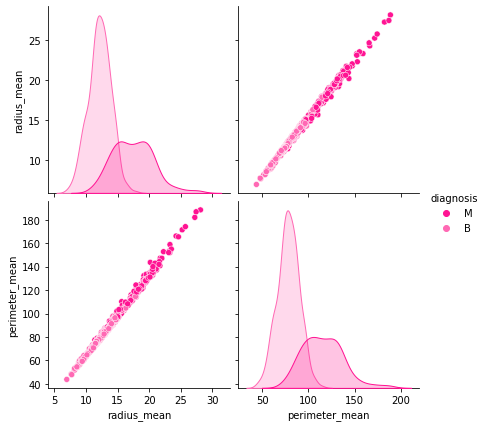

In [15]:
seaborn.pairplot(data_frame, vars=["radius_mean", "perimeter_mean"],
             palette=seaborn.color_palette(['#FF1493', '#FF69B4']), hue='diagnosis', height=3)
plt.show()

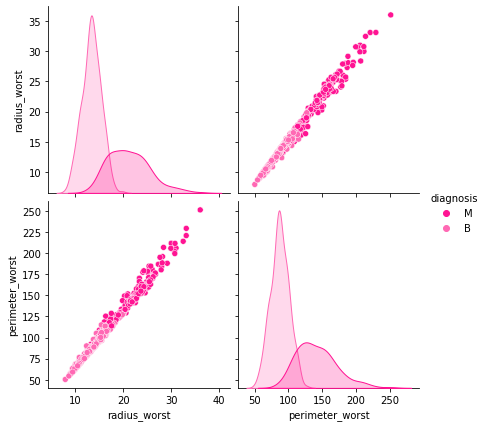

In [16]:
seaborn.pairplot(data_frame, vars=["radius_worst", "perimeter_worst"],
             palette=seaborn.color_palette(['#FF1493', '#FF69B4']), hue='diagnosis', height=3)
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
data_frame.iloc[:, 1] = labelencoder_Y.fit_transform(data_frame.iloc[:,1].values)

In [18]:
X = data_frame.iloc[:, 2:32].values
Y = data_frame.iloc[:, 1].values

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [23]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

 # Function created for implementing ML algorithms
def models(X_train,Y_train):

  # Logistic Regression - Model 0
 from sklearn.linear_model import LogisticRegression
 log=LogisticRegression(random_state=0)
 log.fit(X_train,Y_train)

  # Decision Tree - Model 1
 from sklearn.tree import DecisionTreeClassifier
 tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
 tree.fit(X_train,Y_train)

  # Random forest classifier - Model 2
 from sklearn.ensemble import RandomForestClassifier
 forest = RandomForestClassifier(max_depth=5, n_estimators=100)
 forest.fit(X_train, Y_train)

  # KNN Classifier - Model 3
 from sklearn.neighbors import KNeighborsClassifier
 knn = KNeighborsClassifier(n_neighbors=3)
 knn.fit(X_train, Y_train)

 print(log.score(X_train,Y_train))
 '''print()
 print('Decision tree classifier accuracy for training set:',tree.score(X_train,Y_train))
 print()
 print('Random forest classifier accuracy for training set:', forest.score(X_train, Y_train))
 print()
 print('KNN accuracy for training set:',knn.score(X_train,Y_train))
 print()'''
 return log,tree,knn,forest

0.9906103286384976

Model -  0


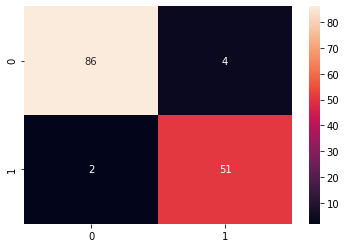

Accuracy for test set: 0.958041958041958

Model -  1


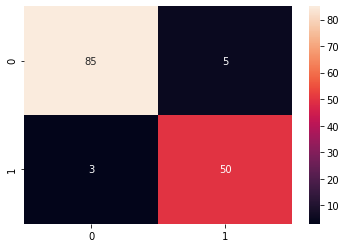

Accuracy for test set: 0.9440559440559441

Model -  2


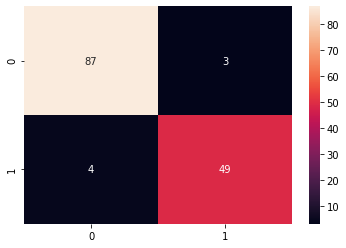

Accuracy for test set: 0.951048951048951

Model -  3


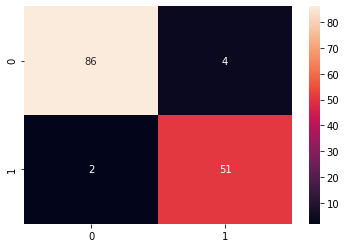

Accuracy for test set: 0.958041958041958



In [24]:
model=models(X_train,Y_train)

from sklearn.metrics import confusion_matrix
print()

for i in range(len(model)):

 print('Model - ',i)
 confusion_mat = confusion_matrix(Y_test, model[i].predict(X_test))
 true_pos=confusion_mat[0][0]
 true_neg=confusion_mat[1][1]
 false_neg=confusion_mat[1][0]
 false_pos=confusion_mat[0][1]
 seaborn.heatmap(confusion_mat, annot=True)
 plt.show()
 print('Accuracy for test set:',(true_pos+true_neg)/(true_pos+true_neg+false_neg+false_pos))
 print()